In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1-Import dataset from Google Drive

In [20]:
import pandas as pd
HDBData=pd.read_csv("/content/drive/MyDrive/HDB data/Project dataset/Median Rent by Town and Flat Type/MedianRentByTownAndFlatType.csv")
HDBData.head()

,quarter,town,flat_type,median_rent
0,2005-Q2,ANG MO KIO,1-RM,na
1,2005-Q2,ANG MO KIO,2-RM,na
2,2005-Q2,ANG MO KIO,3-RM,800
3,2005-Q2,ANG MO KIO,4-RM,950
4,2005-Q2,ANG MO KIO,5-RM,-


##2-Clean Data

In [21]:
dataClean=HDBData[~HDBData.median_rent.str.contains("-|na")]
dataClean.head()


,quarter,town,flat_type,median_rent
2,2005-Q2,ANG MO KIO,3-RM,800
3,2005-Q2,ANG MO KIO,4-RM,950
8,2005-Q2,BEDOK,3-RM,800
9,2005-Q2,BEDOK,4-RM,900
10,2005-Q2,BEDOK,5-RM,1025


In [22]:
dataClean["median_rent"]=dataClean["median_rent"].astype(int)
print(dataClean.dtypes)

quarter        object
town           object
flat_type      object
median_rent     int64
dtype: object


<ipython-input-22-ff634585630c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###2.1 Checking Unique In Each Column

In [23]:
print(pd.unique(dataClean.town))
print(pd.unique(dataClean.flat_type))
print(pd.unique(dataClean.quarter))

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'CHOA CHU KANG'
 'CLEMENTI' 'GEYLANG' 'HOUGANG' 'JURONG EAST' 'JURONG WEST'
 'KALLANG/WHAMPOA' 'MARINE PARADE' 'PASIR RIS' 'QUEENSTOWN' 'SEMBAWANG'
 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN' 'SENGKANG'
 'CENTRAL' 'BUKIT PANJANG' 'PUNGGOL' 'KALLANG/ WHAMPOA' 'BUKIT TIMAH'
 'ANG MO KIO     ' 'BEDOK          ' 'BISHAN         ' 'BUKIT BATOK    '
 'BUKIT MERAH    ' 'BUKIT PANJANG  ' 'CENTRAL        ' 'CHOA CHU KANG  '
 'CLEMENTI       ' 'GEYLANG        ' 'HOUGANG        ' 'JURONG EAST    '
 'JURONG WEST    ' 'MARINE PARADE  ' 'PASIR RIS      ' 'PUNGGOL        '
 'QUEENSTOWN     ' 'SEMBAWANG      ' 'SENGKANG       ' 'SERANGOON      '
 'TAMPINES       ' 'TOA PAYOH      ' 'WOODLANDS      ' 'YISHUN         ']
['3-RM' '4-RM' '5-RM' 'EXEC' '2-RM']
['2005-Q2' '2005-Q3' '2006-Q1' '2005-Q4' '2006-Q2' '2006-Q3' '2006-Q4'
 '2007-Q2' '2007-Q1' '2007-Q3' '2007-Q4' '2008-Q2' '2008-Q1' '2008-Q3'
 '2008-Q4' '2009-Q1' '2009-Q2' '2010-

###2.2 Strip white space in Town column

In [24]:
dataClean["town"]=dataClean.town.str.strip()
print(pd.unique(dataClean.town))

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'CHOA CHU KANG'
 'CLEMENTI' 'GEYLANG' 'HOUGANG' 'JURONG EAST' 'JURONG WEST'
 'KALLANG/WHAMPOA' 'MARINE PARADE' 'PASIR RIS' 'QUEENSTOWN' 'SEMBAWANG'
 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN' 'SENGKANG'
 'CENTRAL' 'BUKIT PANJANG' 'PUNGGOL' 'KALLANG/ WHAMPOA' 'BUKIT TIMAH']


<ipython-input-24-5893cd7f0d79>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###2.3 Converting string to datetime in quarter column

In [25]:
dataClean["quarter"]=pd.PeriodIndex(dataClean["quarter"],freq="Q").to_timestamp()
dataClean.head()

<ipython-input-25-6924996010a8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,quarter,town,flat_type,median_rent
2,2005-04-01,ANG MO KIO,3-RM,800
3,2005-04-01,ANG MO KIO,4-RM,950
8,2005-04-01,BEDOK,3-RM,800
9,2005-04-01,BEDOK,4-RM,900
10,2005-04-01,BEDOK,5-RM,1025


###2.4 Checking data type

In [26]:
print(dataClean.dtypes)

quarter        datetime64[ns]
town                   object
flat_type              object
median_rent             int64
dtype: object


#3-Creating a new dataset about 4-RM

In [27]:
data4RM=dataClean[dataClean.flat_type.str.contains("4-RM")]
data4RM.head()

,quarter,town,flat_type,median_rent
3,2005-04-01,ANG MO KIO,4-RM,950
9,2005-04-01,BEDOK,4-RM,900
15,2005-04-01,BISHAN,4-RM,1000
21,2005-04-01,BUKIT BATOK,4-RM,925
51,2005-04-01,CHOA CHU KANG,4-RM,900


#4-Import matplotlib function to draw data

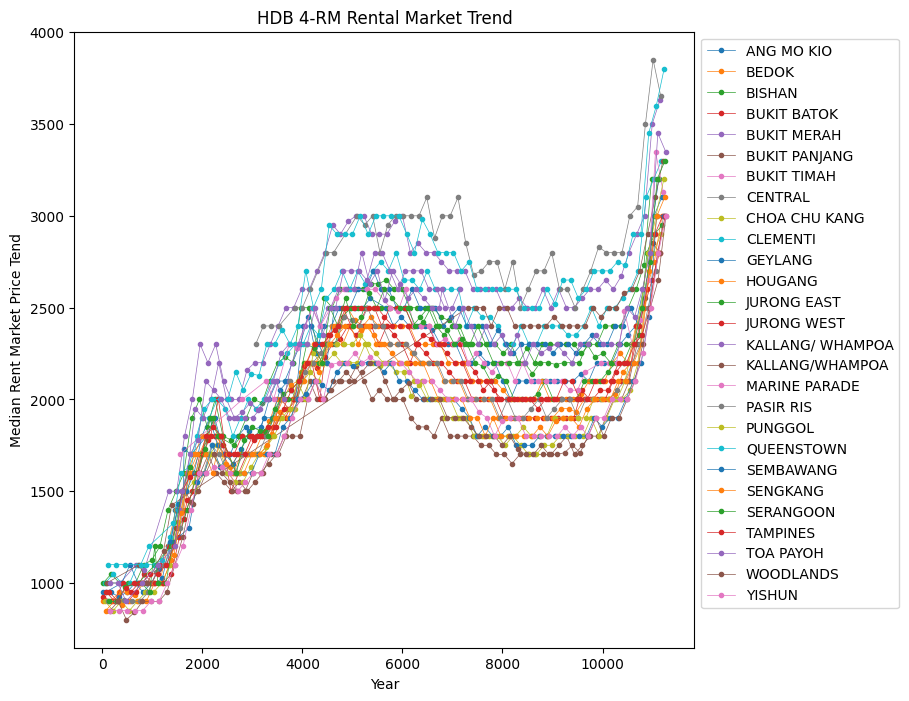

In [28]:
import matplotlib.pyplot as plt
data4RM.groupby("town")["median_rent"].plot(legend=False,marker=".",linewidth=0.5)
plt.rcParams['figure.figsize'] = [8, 8]
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("HDB 4-RM Rental Market Trend")
plt.xlabel('Year')
plt.ylabel('Median Rent Market Price Tend')
plt.show()

# Use plotly to draw an interactive chart, which better presents the details.

In [29]:
import plotly.express as px

fig = px.line(data4RM, x="quarter", y="median_rent", color='town', width=800, height=800)


fig.show()

In [30]:
# add range selector
# https://plotly.com/python/range-slider/

fig = go.Figure()

fig.add_trace(
    go.Line(x=list(data4RM.quarter), y=list(df.High)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()


NameError: ignored